In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sdf=pd.read_csv('D:\\MLProjects\\Datasets\\Advertising.csv')
sdf

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
#Remove unwanted column
sdf=sdf.drop(columns=["Unnamed: 0"])


In [6]:
sdf

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Checking null values

In [7]:
#Checking null values
sdf.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
#Decriptive statistics of DataFrame sdf
sdf.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
#know columns
sdf.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [11]:
sdf['TV'].value_counts()

TV
17.2     2
199.8    2
240.1    2
237.4    2
177.0    2
        ..
149.7    1
38.2     1
94.2     1
283.6    1
232.1    1
Name: count, Length: 190, dtype: int64

In [12]:
sdf['Radio'].value_counts()

Radio
4.1     3
5.7     3
48.9    2
2.6     2
27.7    2
       ..
28.7    1
41.1    1
35.6    1
3.7     1
8.6     1
Name: count, Length: 167, dtype: int64

In [13]:
sdf['Newspaper'].value_counts()

Newspaper
25.6    3
8.7     3
9.3     3
45.1    2
30.0    2
       ..
3.7     1
5.8     1
13.8    1
8.1     1
66.2    1
Name: count, Length: 172, dtype: int64

In [14]:
sdf['Sales'].value_counts()

Sales
9.7     5
12.9    4
15.9    4
11.7    4
10.6    3
       ..
17.6    1
6.7     1
9.9     1
5.9     1
25.5    1
Name: count, Length: 121, dtype: int64

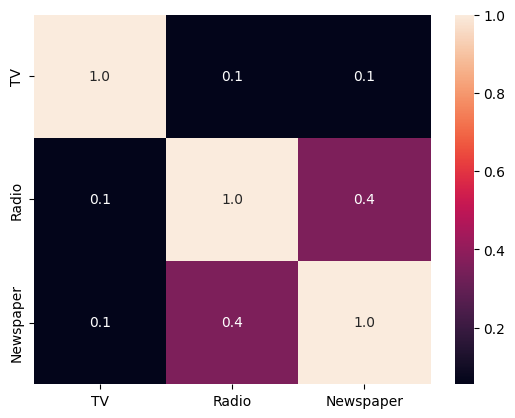

In [15]:
#Visualize correlation coefficient in matrix form
c=['TV','Radio','Newspaper']
cr=sdf[c].corr()

sns.heatmap(cr,annot=True,fmt=".1f")
plt.show()

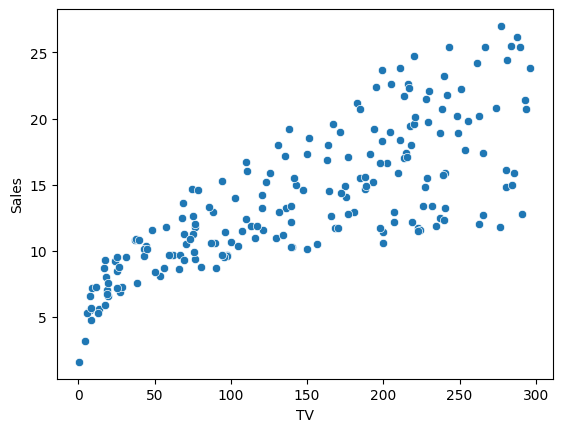

In [16]:
#Check the relation between SALES and TV
# we use scatter plot
sns.scatterplot(x='TV',y='Sales',data=sdf)
plt.show()

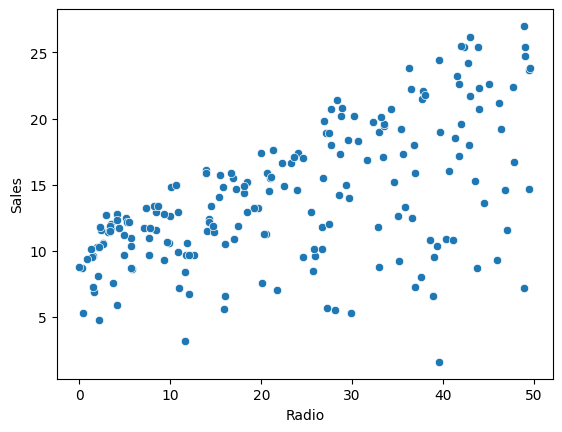

In [17]:
sns.scatterplot(x='Radio',y='Sales',data=sdf)
plt.show()

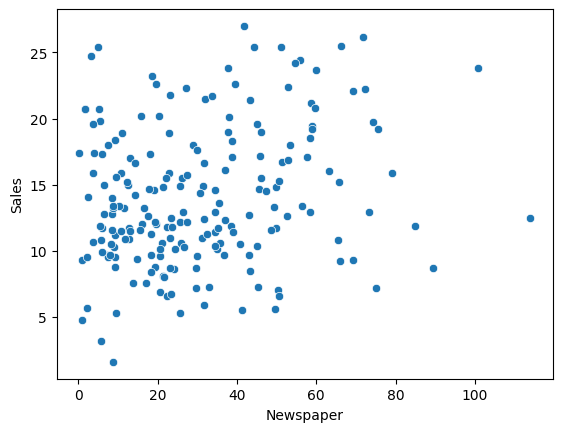

In [18]:
sns.scatterplot(x='Newspaper',y='Sales',data=sdf)
plt.show()

# Check the Outliers

<function matplotlib.pyplot.show(close=None, block=None)>

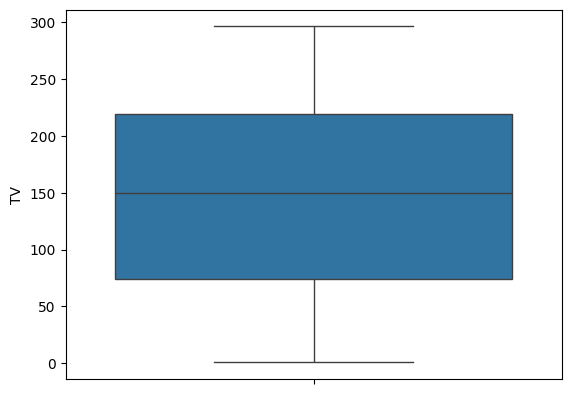

In [19]:
sns.boxplot(sdf['TV'])
plt.show

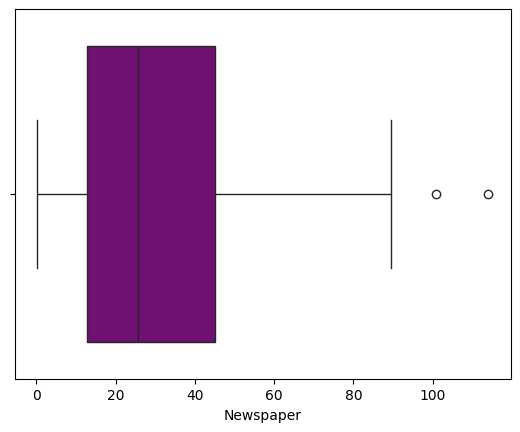

In [21]:
sns.boxplot(sdf['Newspaper'],orient='h',color='purple')
plt.show()

# To remove outliers

In [22]:
pip install feature_engine


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
from feature_engine.outliers import Winsorizer
win=Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=['Newspaper'])
sdf['Newspaper']=win.fit_transform(sdf[['Newspaper']])

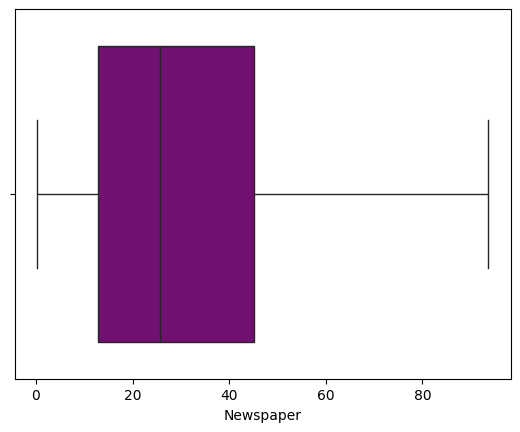

In [25]:
sns.boxplot(sdf['Newspaper'],orient='h',color='purple')
plt.show()

## check distribution of each column

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14848\858619233.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sdf['TV'])


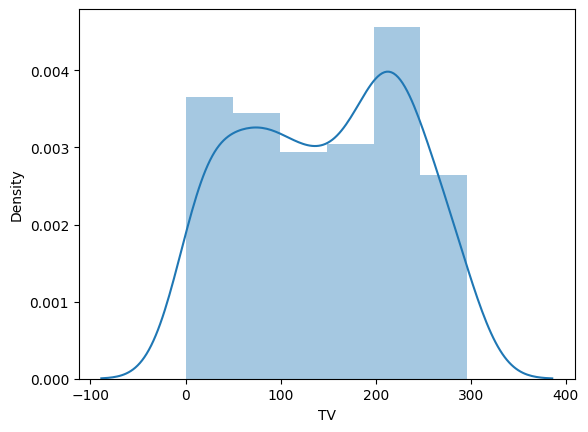

Skewness for TV is= -0.06985336213274573


In [26]:
sns.distplot(sdf['TV'])
plt.show()
print('Skewness for TV is=',sdf['TV'].skew())

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14848\1079947890.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sdf['Radio'])


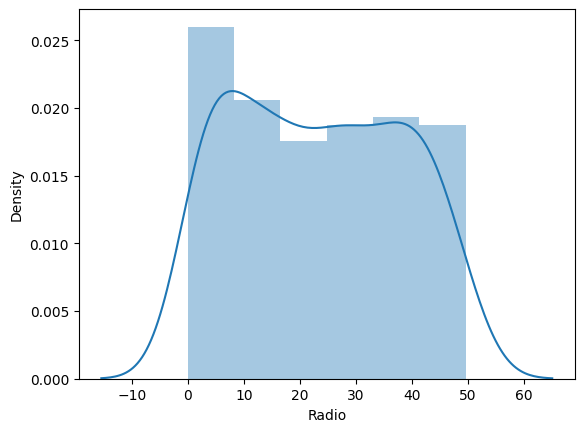

Skewness for Radio is= -0.06985336213274573


In [27]:
sns.distplot(sdf['Radio'])
plt.show()
print('Skewness for Radio is=',sdf['TV'].skew())

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14848\3677272381.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sdf['Newspaper'])


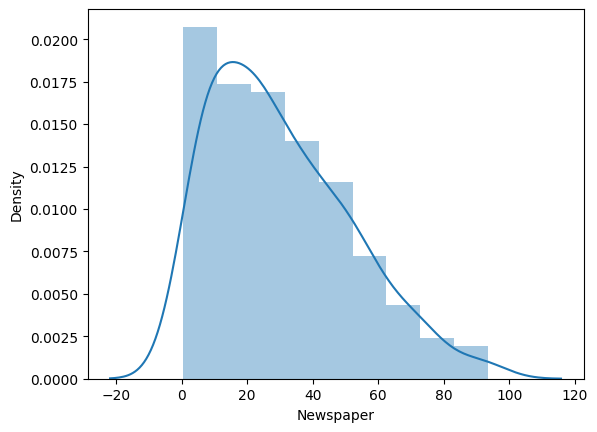

Skewness for Newspaper is= -0.06985336213274573


In [28]:
sns.distplot(sdf['Newspaper'])
plt.show()
print('Skewness for Newspaper is=',sdf['TV'].skew())

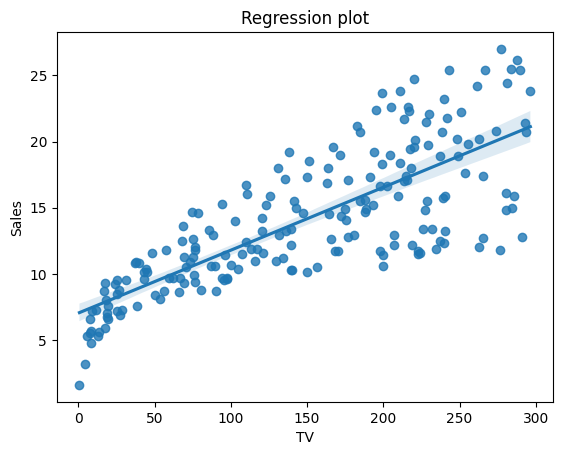

In [29]:
#Regrssion plot
sns.regplot(x='TV',y='Sales',data=sdf)
plt.title('Regression plot')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

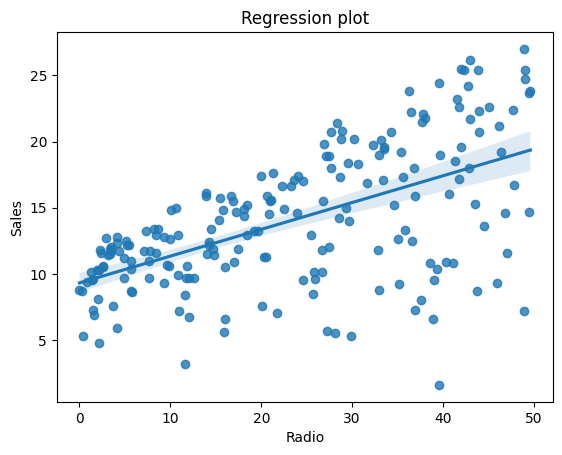

In [30]:
sns.regplot(x='Radio',y='Sales',data=sdf)
plt.title('Regression plot')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.show()

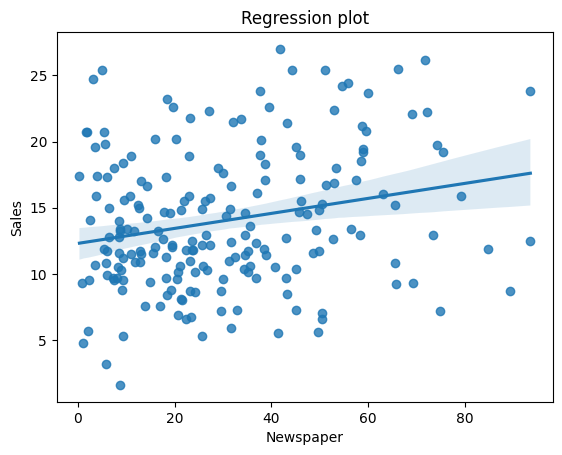

In [31]:
sns.regplot(x='Newspaper',y='Sales',data=sdf)
plt.title('Regression plot')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.show()

# Making input columns into single column

In [32]:
sdf['ad']=sdf['TV']+sdf['Radio']+sdf['Newspaper']

In [33]:
sdf

,TV,Radio,Newspaper,Sales,ad
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


In [34]:
x=sdf.drop(columns=['TV','Radio','Newspaper','Sales'])
print(x)

        ad
0    337.1
1    128.9
2    132.4
3    251.3
4    250.0
..     ...
195   55.7
196  107.2
197  192.7
198  391.8
199  249.4

[200 rows x 1 columns]


In [35]:
y=sdf.drop(columns=['TV','Radio','Newspaper','ad'])
print(y)

     Sales
0     22.1
1     10.4
2      9.3
3     18.5
4     12.9
..     ...
195    7.6
196    9.7
197   12.8
198   25.5
199   13.4

[200 rows x 1 columns]


# Machine learning algorithm using scikitlearn:

In [36]:
pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [38]:
x_train.size

160

In [39]:
x_test.size

40

In [41]:
y_train.size,y_test.size

(160, 40)

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
model=LinearRegression()

In [44]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
## Model built y=mx+c

In [45]:
model.intercept_

array([4.01677216])

In [46]:
model.coef_

array([[0.05043054]])

In [47]:
#train prediction
train_predictions=model.predict(x_train)

In [48]:
train_predictions

array([[ 8.05121532],
       [24.31002123],
       [ 9.30693575],
       [16.55884732],
       [16.94716248],
       [ 8.37397077],
       [14.76856317],
       [19.70571298],
       [ 9.68012174],
       [ 8.6009082 ],
       [10.5172687 ],
       [13.04888178],
       [17.96081632],
       [ 7.90496675],
       [18.97447016],
       [18.78787716],
       [19.28209645],
       [ 5.98860625],
       [22.10620666],
       [14.00327973],
       [12.0604432 ],
       [16.01924055],
       [ 6.52821303],
       [16.22096271],
       [18.72231746],
       [12.69082495],
       [12.6303083 ],
       [16.67988062],
       [16.2108766 ],
       [ 8.67151095],
       [13.49267052],
       [12.2470362 ],
       [18.28861482],
       [ 9.42292599],
       [ 6.92661429],
       [ 8.52526239],
       [ 5.09598571],
       [ 6.6845477 ],
       [15.26278246],
       [14.72821874],
       [15.72170037],
       [23.34175488],
       [17.43129565],
       [16.68996672],
       [10.94088523],
       [ 6

In [49]:
#Test predictions
test_predictions=model.predict(x_test)
test_predictions

array([[13.77508154],
       [20.29070724],
       [10.31050348],
       [12.40841392],
       [11.57631002],
       [19.12071873],
       [16.5941487 ],
       [ 4.60680947],
       [19.02994375],
       [13.45736915],
       [18.17766764],
       [13.73473711],
       [18.53572447],
       [15.17705054],
       [18.43486339],
       [15.25269635],
       [12.99845124],
       [17.70362057],
       [ 8.52526239],
       [13.3312928 ],
       [14.55675491],
       [10.47692426],
       [ 8.71689844],
       [16.06462803],
       [22.2877566 ],
       [11.50570727],
       [ 9.7608106 ],
       [ 9.28676353],
       [15.5098921 ],
       [15.68639899],
       [12.59500692],
       [12.86228878],
       [11.58135308],
       [15.87299198],
       [ 8.65638179],
       [ 8.6109943 ],
       [11.11234906],
       [19.51911999],
       [10.31554654],
       [10.34076181]])

# Prediction on newdata

In [51]:
#70+20+10(TV+Radio+Newspaper)
new=pd.DataFrame(np.array([100]))

In [52]:
model.predict(new)

C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[9.05982611]])

# Acuracy Calculation

In [53]:
from sklearn.metrics import mean_squared_error

In [54]:
#Training Accuracy
model.score(x_train,y_train)

0.7790981745143715

In [ ]:
#77.9 % on train data

In [55]:
model.score(x_test,y_test)

0.5096884826062638

In [56]:
#50.9% on test data

In [57]:
test_RMSE=np.sqrt(mean_squared_error(y_test,test_predictions))

In [59]:
train_RMSE=np.sqrt(mean_squared_error(y_train,train_predictions))

In [60]:
test_RMSE,train_RMSE

(np.float64(2.642157091414578), np.float64(2.576279117505867))

# Visualize out model using graphs

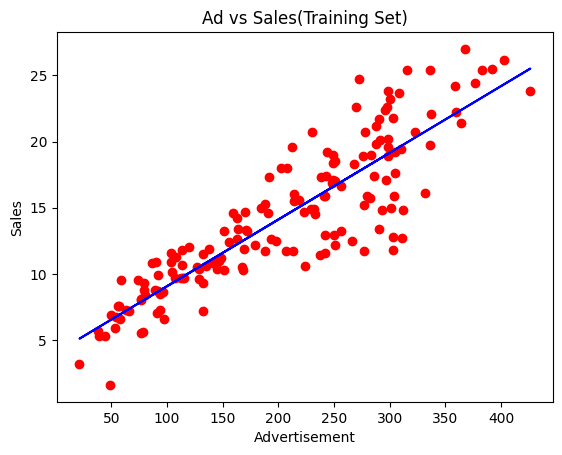

In [61]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,model.predict(x_train),color='blue')
plt.title('Ad vs Sales(Training Set)')
plt.xlabel('Advertisement')
plt.ylabel('Sales')
plt.show()

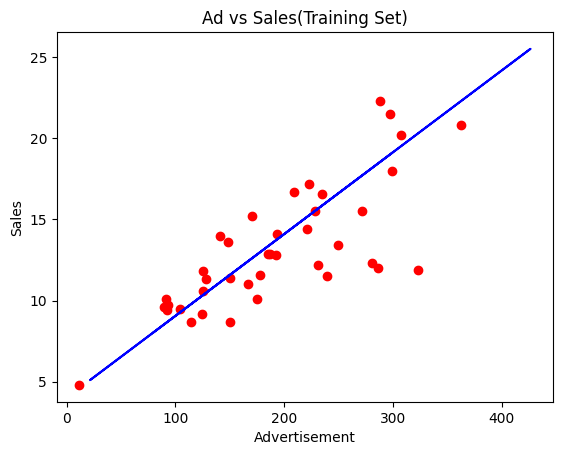

In [62]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_train,model.predict(x_train),color='blue')
plt.title('Ad vs Sales(Training Set)')
plt.xlabel('Advertisement')
plt.ylabel('Sales')
plt.show()